In [1]:
# Import Library
import pandas as pd
#pd.options.display.max_columns = 50

In [2]:
# Import dataset
df_load = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv')

In [3]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7113 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         7113 non-null   int64  
 1   customerID        7113 non-null   object 
 2   gender            7113 non-null   object 
 3   SeniorCitizen     7113 non-null   int64  
 4   Partner           7113 non-null   object 
 5   Dependents        7113 non-null   object 
 6   tenure            7014 non-null   float64
 7   PhoneService      7113 non-null   object 
 8   MultipleLines     7113 non-null   object 
 9   InternetService   7113 non-null   object 
 10  OnlineSecurity    7113 non-null   object 
 11  OnlineBackup      7113 non-null   object 
 12  DeviceProtection  7113 non-null   object 
 13  TechSupport       7113 non-null   object 
 14  StreamingTV       7113 non-null   object 
 15  StreamingMovies   7113 non-null   object 
 16  Contract          7113 non-null   object 


In [4]:
# Show the number of rows and columns
df_load.shape

(7113, 22)

In [5]:
# Show top 5 data
df_load.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [6]:
# Number of unique IDs
df_load.customerID.nunique()

7017

In [7]:
# Filtering for Specific Format Customer ID Numbers

# Looking for the correct format for Customer ID Number (Phone Number) CustomerID, with the following criteria:
# - The length of the characters is 11-12.
# - Consisting of Number Only, not allowed any characters other than numbers
# - Starting with the number 45, the first 2 digits.

df_load['valid_id'] = df_load['customerID'].astype(str).str.match(r'(45\d{9,10})')
df_load = (df_load[df_load['valid_id'] == True]).drop('valid_id', axis = 1)
print('The result of the number of filtered Customer IDs is', df_load['customerID'].count())

The result of the number of filtered Customer IDs is 7006


In [8]:
# Filtering for Duplicate Customer ID Numbers

# Ensure that there are no duplicate customer ID Numbers. Usually this duplicate ID number is the type:
# - Duplication is due to inserting more than once with the same value per column
# - Duplication due to inserting different data retrieval periods

# Drop Duplicate Rows
df_load.drop_duplicates()
# Drop duplicate ID sorted by Periode
df_load = df_load.sort_values('UpdatedAt', ascending=False).drop_duplicates(['customerID'])
print('The result of the number of Customer IDs which have been removed the duplicates (distinct) is',df_load['customerID'].count())

The result of the number of Customer IDs which have been removed the duplicates (distinct) is 6993


In [9]:
df_load.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6993 entries, 0 to 7112
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   UpdatedAt         6993 non-null   int64  
 1   customerID        6993 non-null   object 
 2   gender            6993 non-null   object 
 3   SeniorCitizen     6993 non-null   int64  
 4   Partner           6993 non-null   object 
 5   Dependents        6993 non-null   object 
 6   tenure            6894 non-null   float64
 7   PhoneService      6993 non-null   object 
 8   MultipleLines     6993 non-null   object 
 9   InternetService   6993 non-null   object 
 10  OnlineSecurity    6993 non-null   object 
 11  OnlineBackup      6993 non-null   object 
 12  DeviceProtection  6993 non-null   object 
 13  TechSupport       6993 non-null   object 
 14  StreamingTV       6993 non-null   object 
 15  StreamingMovies   6993 non-null   object 
 16  Contract          6993 non-null   object 


**Conclusion**

The validity of the customer ID Number is needed to ensure that the data we collect is correct. Based on these results, there are differences in the number of ID numbers from the first data loaded to the final result. The number of rows of data when loaded for the first time was 7113 rows and 22 columns with 7017 Unique IDs. Then after checking the validity of the customer ID, there are 6993 rows of data left

# Handling Missing Values with Removing Rows

Next, we will remove Rows from undetected data whether it churns or not. It is assumed that the data modeller only wants to receive data that is correct with a churn flag or not.

In [12]:
print('Total missing values data from the Churn column',df_load['Churn'].isnull().sum())

Total missing values data from the Churn column 43


In [13]:
# Dropping all Rows with spesific column (churn)
df_load.dropna(subset=['Churn'],inplace=True)
print('Total Rows and Data column after the Missing Values data are deleted',df_load.shape)

Total Rows and Data column after the Missing Values data are deleted (6950, 22)


# Handling Missing Values by Filling Certain Values

It is assumed that the modeller data requests filling in missing values with the following criteria:
- Tenure the data modeller asks for each rows that have missing values for the length of subscription to be filled with 11
- Numeric variables other than tenure are filled with the median of each of these variables

Are there still missing values data?

In [16]:
print('Status Missing Values :',df_load.isnull().values.any())
print('\nThe number of missing values for each column is:')
print(df_load.isnull().sum().sort_values(ascending=False))

Status Missing Values : True

The number of missing values for each column is:
tenure              99
MonthlyCharges      26
TotalCharges        15
Churn                0
InternetService      0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
PhoneService         0
MultipleLines        0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
UpdatedAt            0
dtype: int64


In [20]:
# Handling missing values Tenure fill with 11
df_load['tenure'].fillna(11, inplace=True)

# Handling missing values num vars (except Tenure)
for col_name in list(['MonthlyCharges','TotalCharges']):
    median = df_load[col_name].median()
    df_load[col_name].fillna(median, inplace=True)

In [21]:
print('\nThe number of Missing Values after imputer the data are:')
print(df_load.isnull().sum().sort_values(ascending=False))


The number of Missing Values after imputer the data are:
Churn               0
TotalCharges        0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
UpdatedAt           0
dtype: int64


**Conclusion**

After we analyzed it further, it turned out that there were still Missing Values from the data that we validated the customer ID Number. Missing values are in the Churn, tenure, MonthlyCharges & TotalCharges columns. After we handle it by deleting rows and filling in certain values, it is proven that there are no more missing values in the data, as evidenced by the number of missing values for each variable which is worth 0. Next, we will handle the outliers.

# Detect Outliers by creating Boxplot

In [22]:
# Import Library
import matplotlib.pyplot as plt
import seaborn as sns

In [24]:
# first, look at distribution of data before handling outliers
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.477266,65.783741,2305.083460
std,25.188910,50.457871,2578.651143
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,500.000000,2311.000000,80000.000000


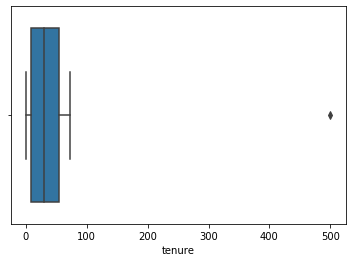

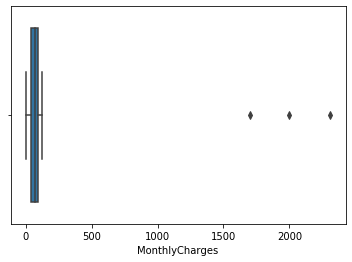

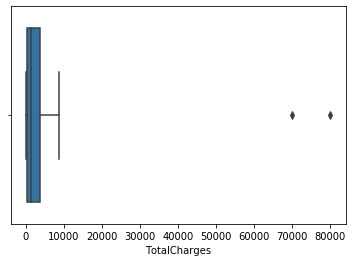

In [25]:
# Create BoxPlot
plt.figure() # to create a new figure
sns.boxplot(x=df_load['tenure'])
plt.show()

plt.figure() # to create a new figure
sns.boxplot(x=df_load['MonthlyCharges'])
plt.show()

plt.figure() # to create a new figure
sns.boxplot(x=df_load['TotalCharges'])
plt.show()

# Handling Outliers

Next, we will handling the outliers using the interquartile range (IQR) method.

In [29]:
# Handling with IQR
Q1 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.25)
Q3 = (df_load[['tenure','MonthlyCharges','TotalCharges']]).quantile(0.75)

# Specifies the Minimum and Maximum data values to be tolerated
IQR = Q3 - Q1
maximum = Q3 + (1.5*IQR)
print('The Maximum Value of each Variable is: ')
print(maximum)

minimum = Q1 - (1.5*IQR)
print('\nThe Minimum Value of each Variable is: ')
print(minimum)

The Maximum Value of each Variable is: 
tenure             124.00000
MonthlyCharges     169.93125
TotalCharges      8889.13125
dtype: float64

The Minimum Value of each Variable is: 
tenure             -60.00000
MonthlyCharges     -43.61875
TotalCharges     -4682.31875
dtype: float64


In [30]:
# Change the value which is outside the Minimum & Maximum Range into the Minimum and Maximum values
more_than = (df_load > maximum)
lower_than = (df_load < minimum)
df_load = df_load.mask(more_than, maximum, axis=1)
df_load = df_load.mask(lower_than, minimum, axis=1)

In [31]:
# Distribution of data after being handled by Outliers
df_load[['tenure','MonthlyCharges','TotalCharges']].describe()

,tenure,MonthlyCharges,TotalCharges
count,6950.000000,6950.000000,6950.000000
mean,32.423165,64.992201,2286.058750
std,24.581073,30.032040,2265.702553
min,0.000000,0.000000,19.000000
25%,9.000000,36.462500,406.975000
50%,29.000000,70.450000,1400.850000
75%,55.000000,89.850000,3799.837500
max,124.000000,169.931250,8889.131250


**Conclusion**

From the three boxplots with the variables 'tenure', 'MonthlyCharges' & 'TotalCharges', it is clear that there are outliers. This can be identified from the points that are far from the boxplot image. Then if we look at the data distribution from the max column there is also a very high value.

Then the outlier value is handled by changing the value to the Maximum & Minimum value of the interquartile range (IQR). After handling the outliers, and looking at the data distribution, it appears that there are no more outliers.

# Standardize Values

In [33]:
# Loop for Detect Nonstandard Values

for col_name in list(['gender',
                      'SeniorCitizen',
                      'Partner',
                      'Dependents',
                      'PhoneService',
                      'MultipleLines',
                      'InternetService',
                      'OnlineSecurity',
                      'OnlineBackup',
                      'DeviceProtection',
                      'TechSupport',
                      'StreamingTV',
                      'StreamingMovies',
                      'Contract',
                      'PaperlessBilling',
                      'PaymentMethod',
                      'Churn']):
    print('\nUnique Values Count \033[1m' + 'Before Standardized \033[0m Variable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count Before Standardized  Variable gender
Male         3499
Female       3431
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

Unique Values Count Before Standardized  Variable SeniorCitizen
0    5822
1    1128
Name: SeniorCitizen, dtype: int64

Unique Values Count Before Standardized  Variable Partner
No     3591
Yes    3359
Name: Partner, dtype: int64

Unique Values Count Before Standardized  Variable Dependents
No     4870
Yes    2060
Iya      20
Name: Dependents, dtype: int64

Unique Values Count Before Standardized  Variable PhoneService
Yes    6281
No      669
Name: PhoneService, dtype: int64

Unique Values Count Before Standardized  Variable MultipleLines
No                  3346
Yes                 2935
No phone service     669
Name: MultipleLines, dtype: int64

Unique Values Count Before Standardized  Variable InternetService
Fiber optic    3057
DSL            2388
No             1505
Name: InternetService, dtype: int64

Unique Values Count Befor

In [36]:
# Standardizing Categorical Variables

# Use the replace () function to standardize values
df_load = df_load.replace(['Wanita','Laki-Laki','Churn','Iya'],['Female','Male','Yes','Yes'])

# Loop
for col_name in list(['gender','Dependents','Churn']):
    print('\nUnique Values Count \033[1m' + 'After Standardized \033[0mVariable',col_name)
    print(df_load[col_name].value_counts())


Unique Values Count After Standardized Variable gender
Male      3505
Female    3445
Name: gender, dtype: int64

Unique Values Count After Standardized Variable Dependents
No     4870
Yes    2080
Name: Dependents, dtype: int64

Unique Values Count After Standardized Variable Churn
No     5114
Yes    1836
Name: Churn, dtype: int64


**Conclusion**

When we look further from the number of unique values of each categorical variable, it is clear that there are several variables that are not standardized. The variables are:
* Gender (Female, Male, *Wanita, Laki-Laki*), which can be standardized as (Female, Male) because it has the same meaning.
* Dependents (Yes, No, *Iya*), which can be standardized to (Yes, No) because they have the same meaning.
* Churn (Yes, No, Churn), which can be standardized as (Yes, No) because it has the same meaning.

After we have standardized the value, and we look back at the data form, it is well standardized for its unique value.